# **Statistical Analysis of Peak-to-Peak Differences**


**Code was adapted from:** (last accessed 06.08.2024)

Bedre, R. (2021, October 2). *Repeated Measures ANOVA using Python and R (with examples)*. RS Blog. https://www.reneshbedre.com/blog/repeated-measure-anova.html

In [1]:
!pip install pingouin
import numpy as np
import pandas as pd
from statsmodels.stats.anova import AnovaRM
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import pingouin as pg
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [2]:
# load dataset
df = pd.read_csv('diff.csv', names=['face', 'body', 'object'], header=None)
df['subject'] = df.index

# reshape data
difference = pd.melt(df, id_vars = 'subject', var_name = 'condition', value_name = 'response')
difference.head()

,subject,condition,response
0,0,face,11.699585
1,1,face,6.413153
2,2,face,17.214211
3,3,face,4.810861
4,4,face,4.300723


## **Descriptive Statistics**

In [3]:
difference.loc[difference['condition'] == 'face'].describe()

,subject,response
count,10.00000,10.000000
mean,4.50000,8.212907
std,3.02765,4.475352
min,0.00000,3.051780
25%,2.25000,5.177740
50%,4.50000,6.942956
75%,6.75000,10.676789
max,9.00000,17.214211


In [4]:
difference.loc[difference['condition'] == 'body'].describe()

,subject,response
count,10.00000,10.000000
mean,4.50000,7.023416
std,3.02765,4.159136
min,0.00000,2.127593
25%,2.25000,5.315313
50%,4.50000,5.829129
75%,6.75000,7.923053
max,9.00000,16.736567


In [5]:
difference.loc[difference['condition'] == 'object'].describe()

,subject,response
count,10.00000,10.000000
mean,4.50000,6.018760
std,3.02765,2.831824
min,0.00000,3.251591
25%,2.25000,3.760878
50%,4.50000,4.952332
75%,6.75000,8.105072
max,9.00000,11.712706


## **Repeated Measure One-Way ANOVA**




In [6]:
print(AnovaRM(data=difference, depvar='response', subject='subject', within=['condition']).fit())

                 Anova
          F Value Num DF  Den DF Pr > F
---------------------------------------
condition  3.9373 2.0000 18.0000 0.0382



In [7]:
res = pg.rm_anova(dv='response', within='condition', subject='subject', data=difference, detailed=True)
res

,Source,SS,DF,MS,F,p-unc,ng2,eps
0,condition,24.128332,2,12.064166,3.937287,0.038159,0.055821,0.723449
1,Error,55.153462,18,3.064081,NaN,NaN,NaN,NaN


## **Post Hoc Tests**
**Tukey's Test**

In [8]:
tukey = pairwise_tukeyhsd(endog=difference['response'], groups=difference['condition'], alpha=0.05)
print(tukey)

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
  body   face   1.1895 0.7747 -3.1215 5.5005  False
  body object  -1.0047  0.833 -5.3156 3.3063  False
  face object  -2.1941 0.4283 -6.5051 2.1168  False
---------------------------------------------------


**Bonferroni Correction**

In [9]:
post_hocs = pg.pairwise_tests(dv='response', within='condition', subject='subject', padjust='bonf', data=difference)
post_hocs

,Contrast,A,B,Paired,Parametric,T,dof,alternative,p-unc,p-corr,p-adjust,BF10,hedges
0,condition,body,face,True,True,-1.832142,9.0,two-sided,0.100154,0.300463,bonf,1.054,-0.263702
1,condition,body,object,True,True,1.540634,9.0,two-sided,0.157794,0.473381,bonf,0.765,0.270440
2,condition,face,object,True,True,2.203308,9.0,two-sided,0.055043,0.165128,bonf,1.639,0.561152


## **ANOVA Assumptions**

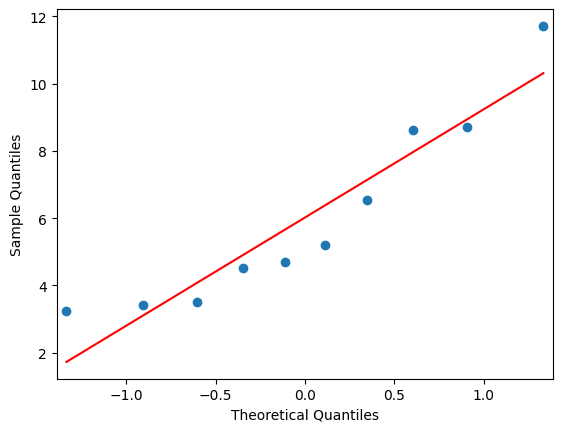

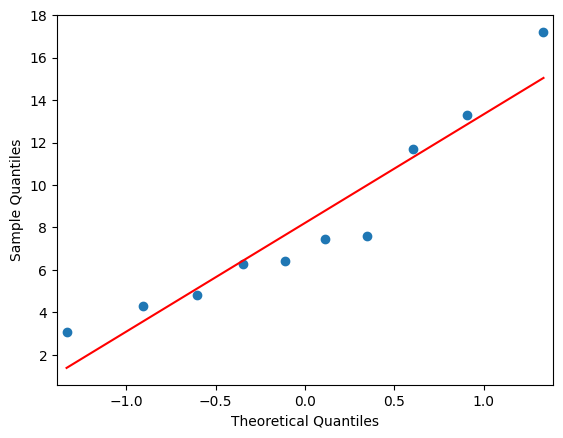

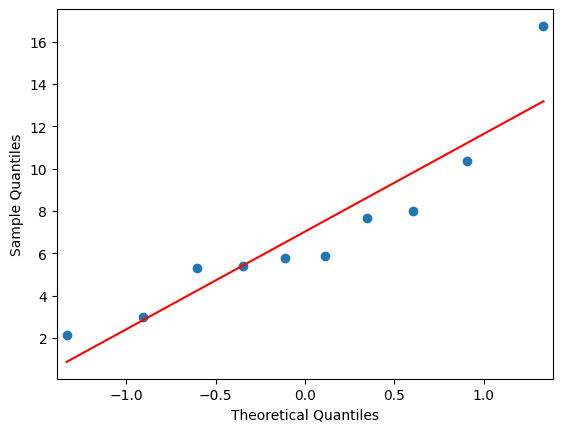

In [10]:
#create Q-Q plot plots
fig = sm.qqplot(difference.loc[difference['condition'] == 'object']['response'], line='r')
fig = sm.qqplot(difference.loc[difference['condition'] == 'face']['response'], line='r')
fig = sm.qqplot(difference.loc[difference['condition'] == 'body']['response'], line='r')

plt.show()


In [11]:
# Mauchly’s test of sphericity
pg.sphericity(data=difference, dv='response', subject='subject', within='condition')[-1]

0.14561298453592805

In [12]:
# assumption of normality
pg.normality(data=difference, dv='response', group='condition')

,W,pval,normal
condition,,,
face,0.903417,0.238762,True
body,0.875692,0.116397,True
object,0.878985,0.127035,True
